# Sprint 15: Unsupervised learning - clustering

#### Imports

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("DelayedFlights.csv")
df.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


I will work with Delta Air Lines but before let's clean the data and apply some feature engeneering.

In [6]:
#selecting 
df_flights = df.loc[df['UniqueCarrier'] == 'DL']

In [7]:
#clean the data, feature I will not use, for clustering I will select only numeric features
df_flights.drop(['Unnamed: 0','Year','FlightNum','TailNum','CancellationCode','UniqueCarrier'],axis=1, inplace=True)

In [8]:
df_flights.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [9]:
#dealing fith cathegorical variables 'Origin', 'Dest'
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
print(cat_df_flights.isnull().values.sum())#do I have some null values?

0


In [10]:
#list of all airports
first_list = cat_df_flights['Origin'].tolist()
second_list = cat_df_flights['Dest'].tolist()
resultList= list(set(first_list) | set(second_list))
print(resultList)

['IAD', 'GPT', 'CVG', 'ELP', 'FLL', 'BDL', 'VPS', 'BUF', 'PHL', 'BNA', 'FCA', 'TPA', 'BOS', 'BOI', 'MOB', 'DTW', 'CAE', 'SAN', 'COS', 'DAY', 'CMH', 'PHF', 'TLH', 'LAS', 'HOU', 'GEG', 'DEN', 'MCO', 'ANC', 'MSY', 'ORF', 'SRQ', 'ROC', 'SAT', 'EGE', 'RIC', 'JAC', 'TUS', 'PDX', 'FAI', 'DCA', 'SLC', 'MSP', 'JFK', 'OKC', 'MIA', 'STL', 'RNO', 'LIT', 'SJU', 'GSO', 'EWR', 'LGA', 'ONT', 'BWI', 'SFO', 'ORD', 'PHX', 'SNA', 'JAX', 'SJC', 'LIH', 'ABQ', 'BZN', 'PNS', 'SEA', 'MLB', 'PIT', 'JAN', 'SMF', 'TYS', 'CAK', 'CHS', 'LEX', 'GSP', 'HNL', 'KOA', 'DAB', 'MTJ', 'IND', 'SAV', 'BHM', 'IAH', 'DFW', 'OAK', 'MCI', 'RSW', 'GUC', 'RDU', 'STT', 'STX', 'ATL', 'AUS', 'LAX', 'PBI', 'SDF', 'CLE', 'HSV', 'CLT', 'OGG', 'MKE', 'HDN', 'PWM', 'MEM']


In [11]:
labels = resultList
replace_map1 = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map2 = {'Dest' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [12]:
#apply map to columns Origin and Dest, numbers assigned to airports are the same in both columns
df_flights.replace(replace_map1, inplace=True)
df_flights.replace(replace_map2, inplace=True)
print(df_flights['Origin'],df_flights['Dest'])

95860      55
95861      92
95862       9
95863      24
95864      42
           ..
1936753    43
1936754    36
1936755    92
1936756     1
1936757    34
Name: Origin, Length: 114238, dtype: int64 95860      92
95861      46
95862      92
95863      42
95864      55
           ..
1936753    92
1936754    92
1936755    83
1936756    92
1936757    92
Name: Dest, Length: 114238, dtype: int64


In [13]:
#missing data?
df_flights.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                426
CRSArrTime               0
ActualElapsedTime      510
CRSElapsedTime           0
AirTime                510
ArrDelay               510
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 426
TaxiOut                 17
Cancelled                0
Diverted                 0
CarrierDelay         41986
WeatherDelay         41986
NASDelay             41986
SecurityDelay        41986
LateAircraftDelay    41986
dtype: int64

In [14]:
#calculating mean value for missing data
def myfunc(x):
    df_flights[x]=df_flights[x].fillna(df_flights[x].mean())

mylist = ['ArrTime','ActualElapsedTime','AirTime','ArrDelay',
          'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay',
          'NASDelay','SecurityDelay','LateAircraftDelay']
for x in mylist:
    myfunc(x)

In [15]:
#standartization
scaler = StandardScaler()
dfScaled = df_flights
dfScaled[dfScaled.columns] = scaler.fit_transform(dfScaled[dfScaled.columns])
dfScaled.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


#### Test sample

In [16]:
#simple random sample
df_sample = dfScaled.sample(n = 100)

In [17]:
df_sample.shape

(100, 24)

## Level 1

### Exercise 1

#### Classification of flights with K-means

In [58]:
model1 = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
model1.fit(df_sample)

KMeans(init='random', n_clusters=3, random_state=42)

In [48]:
#the lowest SSE value
model1.inertia_

1741.2373619302828

In [49]:
#final locations of centroid
model1.cluster_centers_

array([[-7.48114824e-01, -1.00840864e+00,  2.27402005e-01,
         4.45357943e-01, -1.03034950e+00,  1.11855733e+00,
        -2.87828587e-01,  5.08082675e-01,  3.82505386e-01,
         3.79313383e-01,  7.28603803e+00,  7.67395477e+00,
         1.67225025e-01,  2.62631170e-01,  5.63481418e-01,
         6.43772878e-01,  4.92267197e-01, -1.35595187e-02,
        -6.55662939e-02, -5.76551158e-01,  3.35619894e+01,
        -3.22679764e-02, -2.17513799e-02, -7.10433472e-01],
       [ 7.71626047e-02,  2.74162474e-02,  1.80290683e-01,
        -1.36439189e-02, -3.00919651e-02, -9.18624351e-02,
        -8.57773151e-02, -5.15156830e-01, -5.29285729e-01,
        -5.39787585e-01,  2.27741892e-01,  2.25157797e-01,
         2.51265451e-02, -4.29259076e-02, -5.46260310e-01,
        -1.25437906e-01,  8.01022601e-02, -1.35595187e-02,
        -6.55662939e-02,  2.00221044e-01, -5.37688646e-02,
         6.08459697e-02, -1.44029408e-02,  7.31738180e-02],
       [ 1.80485253e-01,  1.16840910e-01, -6.31178146e

In [77]:
#number of iterations required to converge
model1.n_iter_

4

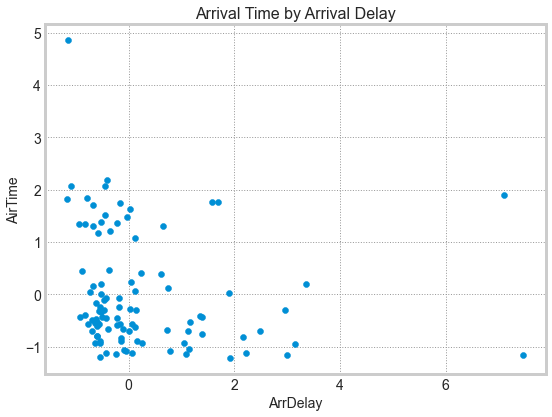

In [319]:
#visualisation of raw data
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.scatter(df_sample['ArrDelay'], df_sample['AirTime'])
plt.title("Arrival Time by Arrival Delay", fontsize = 16)
plt.xlabel("ArrDelay",fontsize = 14)
plt.ylabel("AirTime",fontsize = 14)
plt.show()

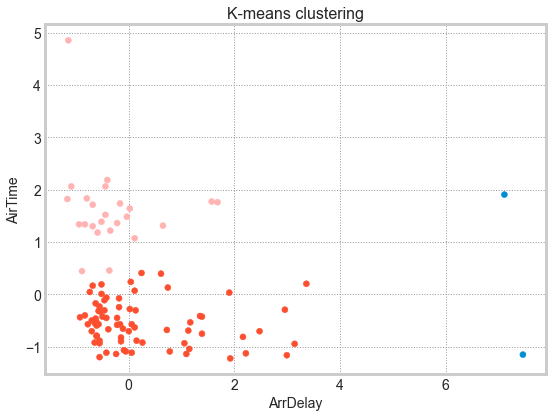

In [355]:
#visualisation of clusters
plt.figure(figsize=(8, 6))
fte_colors1 = {0: "#008fd5",1: "#fc4f30",2: "#ffb3b3"}
km_colors = [fte_colors1[label] for label in model1.labels_]

sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.scatter(df_sample['ArrDelay'], df_sample['AirTime'], c=km_colors)
plt.title("K-means clustering", fontsize = 16)
plt.xlabel("ArrDelay",fontsize = 14)
plt.ylabel("AirTime",fontsize = 14)
plt.show()

## Level 2

### Exercise 2

#### Classification of flights with hierarchical clustering

In [70]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model2.fit_predict(df_sample)

array([0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0])

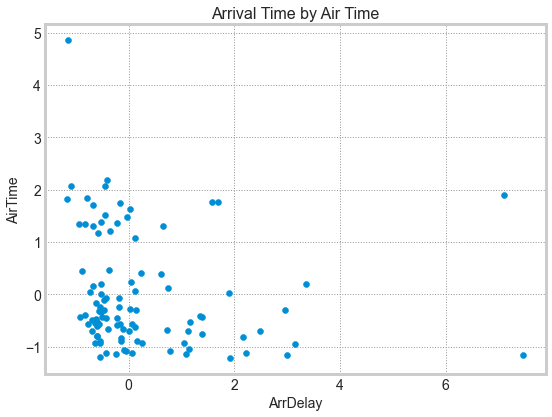

In [327]:
#visualisation of raw data
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.scatter(df_sample['ArrDelay'], df_sample['AirTime'])
plt.title("Arrival Time by Air Time", fontsize = 16)
plt.xlabel("ArrDelay",fontsize = 14)
plt.ylabel("AirTime",fontsize = 14)
plt.show()

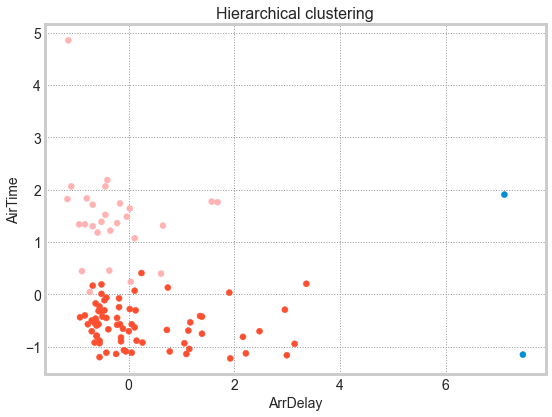

In [360]:
#visualisation of clusters
plt.figure(figsize=(8, 6))
fte_colors2 = {0: "#fc4f30",1: "#008fd5",2: "#ffb3b3"}
hie_colors = [fte_colors2[label] for label in model2.labels_]

sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.scatter(df_sample['ArrDelay'], df_sample['AirTime'], c=hie_colors)
plt.title("Hierarchical clustering", fontsize = 16)
plt.xlabel("ArrDelay",fontsize = 14)
plt.ylabel("AirTime",fontsize = 14)
plt.show()

Conclusion:
- If we divide sample in 3 clusters we can observe that there are some differences between these two types of clustering applied but both clustering methods have very similar results.

## Level 3

### Exercise 3

##### Evaluate the clusters + appropriate number of clusters

#### K-means: Choosing the appropriate number of clusters - Elbow method

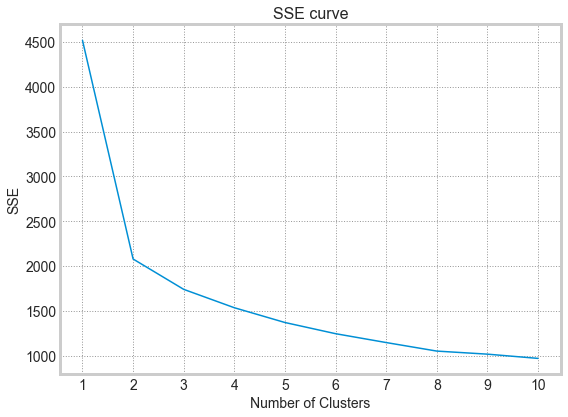

In [329]:
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model1elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model1elbow.fit(df_sample)
    sse.append(model1elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 16)
plt.xlabel("Number of Clusters",fontsize = 14)
plt.ylabel("SSE",fontsize = 14)
plt.show()

Interpretation:
- The elbow is located at x=2, that means we can use 2 clusters for K-means clustering.

In [55]:
#when determining the elbow point in the SSE curve is not so straightforward, use of library kneed
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

2

#### K-means: Choosing the appropriate number of clusters - Silhouette coefficient

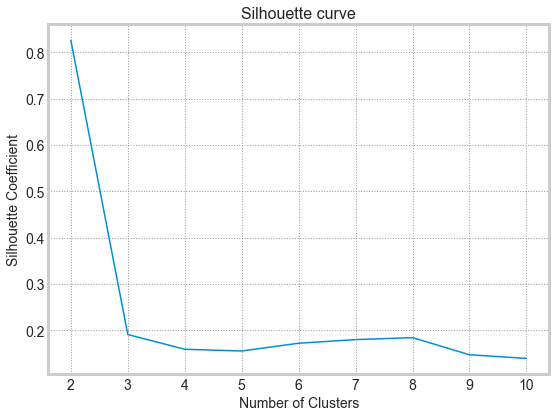

In [330]:
silhouette_coefficients = []
for k in range(2, 11):
    model1silhouette = KMeans(n_clusters=k, **kmeans_kwargs)
    model1silhouette.fit(df_sample)
    score1 = silhouette_score(df_sample, model1silhouette.labels_)
    silhouette_coefficients.append(score1)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("Silhouette curve", fontsize = 16)
plt.xlabel("Number of Clusters",fontsize = 14)
plt.ylabel("Silhouette Coefficient",fontsize = 14)
plt.show()

Interpretation:
- The maximum of silhouette curve is located at x=2, that means the best number of clusters is 2.

#### Hierarchical clustering evaluation

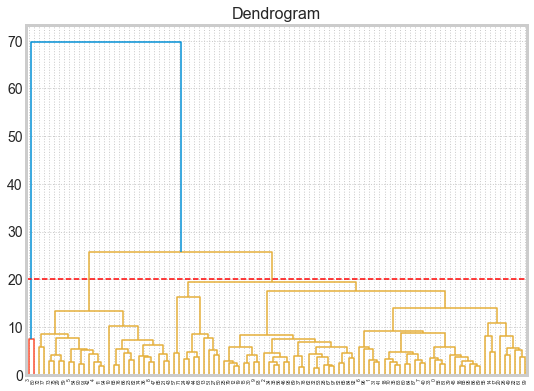

In [405]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 16)  
dend = shc.dendrogram(shc.linkage(df_sample, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

Interpretation:
- If we choose threshold y=20 the line cuts the dendrogram in 3 points - that indicates the number of clusters.

#### Choosing the appropriate number of clusters - Advanced Techniques

In [268]:
#k-means with 2 clusters as was the resalut from elbow method
model3 = KMeans(n_clusters=2)
model3.fit(df_sample)
#dbscan - eps is the distance between two samples - neighborhood
model4 = DBSCAN(eps=4)
model4.fit(df_sample)

DBSCAN(eps=4)

In [246]:
#arbitrary assigned numbers to clusters
model3.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [271]:
#arbitrary assigned numbers to clusters
model4.labels_ = abs(model4.labels_)
model4.labels_ 

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [337]:
kmeans_silhouette1 = silhouette_score(df_sample, model3.labels_).round(2)
dbscan_silhouette1 = silhouette_score(df_sample, model4.labels_).round(2)
print(kmeans_silhouette1,dbscan_silhouette1)

0.83 0.32


In [286]:
# selecting the same size for plots and same columns as before so we can compare
a = df_sample['ArrDelay']
b = df_sample['AirTime']

In [218]:
print(a.size, b.size)

100 100


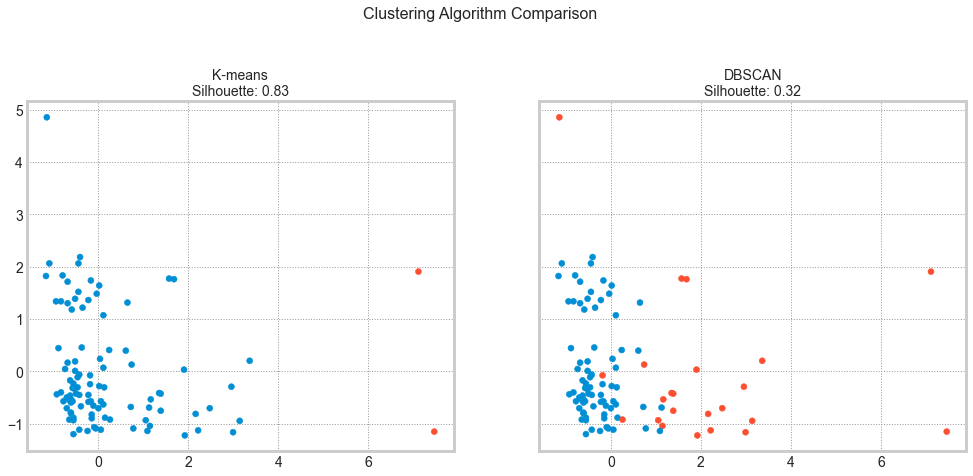

In [338]:
#plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=16, y=1.1)
fte_colors = {0: "#008fd5",1: "#fc4f30"}

#the kmeans plot
km_colors = [fte_colors[label] for label in model3.labels_]
ax1.scatter(a, b, c=km_colors)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette1}",fontsize=14)
#the dbscan plot
db_colors = [fte_colors[label] for label in model4.labels_]
ax2.scatter(a, b, c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette1}",fontsize=14)

plt.show()

Interpretation:
- Silhouette coefficient is representing how close or far data pointa are to each other in one cluster.
- K-means or Density based spacial clustering(dbscan): In case of my dataset it might be interesting to use DBSCAN because it appears to find more data points and divides the clusters in one cluster with common data and another one with mostly outliers data.
- Silhouette coefficient is better in Density based spacial clustering.

### PCA: Reducing the dimension

We can reduce the whole dataset to 2D and than perform clustering.

In [290]:
dfScaled.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


In [291]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfScaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#### Classification of flights with K-means after rescaling with PCA

In [297]:
#how many clusters?
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model5elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model5elbow.fit(df_sample2)
    sse.append(model5elbow.inertia_)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

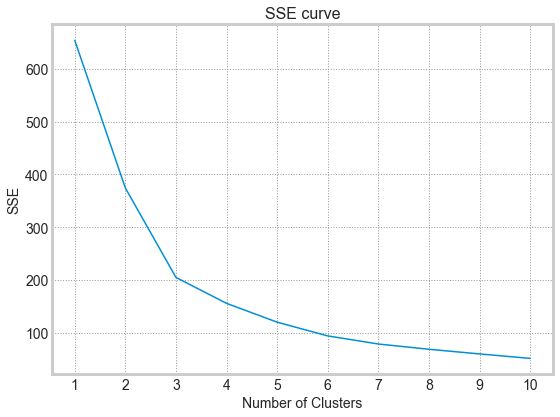

In [374]:
#SSE curve or error to check number of clusters
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model5elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model5elbow.fit(df_sample2)
    sse.append(model5elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 16)
plt.xlabel("Number of Clusters",fontsize = 14)
plt.ylabel("SSE",fontsize = 14)
plt.show()

Conclusion: The best division will be in 3 clusters.

In [298]:
#simple random sample
df_sample2 = principalDf.sample(n = 100)
#k-means
model5 = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
model5.fit(df_sample2)

KMeans(init='random', n_clusters=3, random_state=42)

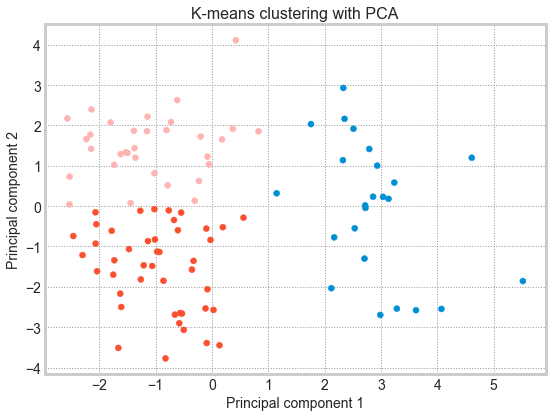

In [380]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors1 = {0: "#fc4f30",1: "#ffb3b3",2: "#008fd5"}
km_colors2 = [fte_colors1[label] for label in model5.labels_]

plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=km_colors2)
plt.title("K-means clustering with PCA", fontsize = 16)
plt.xlabel("Principal component 1",fontsize = 14)
plt.ylabel("Principal component 2",fontsize = 14)
plt.show()

#### Classification of flights with hierarchical clustering with PCA

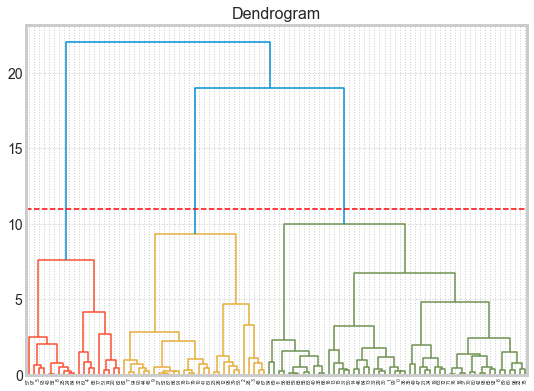

In [406]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 16)  
dend = shc.dendrogram(shc.linkage(df_sample2, method='ward'))
plt.axhline(y=11, color='r', linestyle='--')
plt.show()

The threshold value is y=11 and the threshold line cuts dendrogram in 3 parts - 3 clusters.

In [407]:
model6 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model6.fit_predict(df_sample2)

array([0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0])

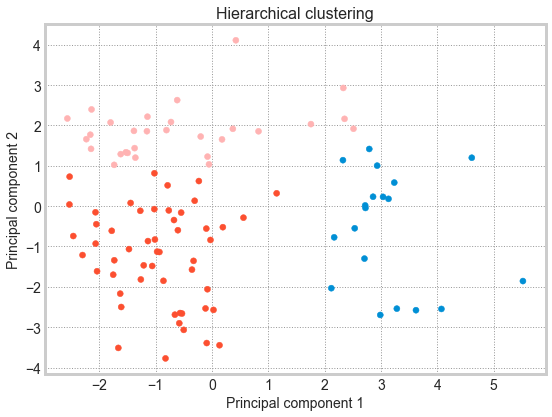

In [412]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors = {0: "#fc4f30",1: "#008fd5",2: "#ffb3b3"}

hie_colors2 = [fte_colors[label] for label in model6.labels_]
plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=hie_colors2)
plt.title("Hierarchical clustering", fontsize = 16)
plt.xlabel("Principal component 1",fontsize = 14)
plt.ylabel("Principal component 2",fontsize = 14)
plt.show()

In [393]:
kmeans_silhouette2 = silhouette_score(df_sample2, model5.labels_).round(2)
hierarchical_silhouette2 = silhouette_score(df_sample2, model6.labels_).round(2)
print(kmeans_silhouette2,hierarchical_silhouette2)

0.46 0.38


In [394]:
c = df_sample2['principal component 1']
d = df_sample2['principal component 2']

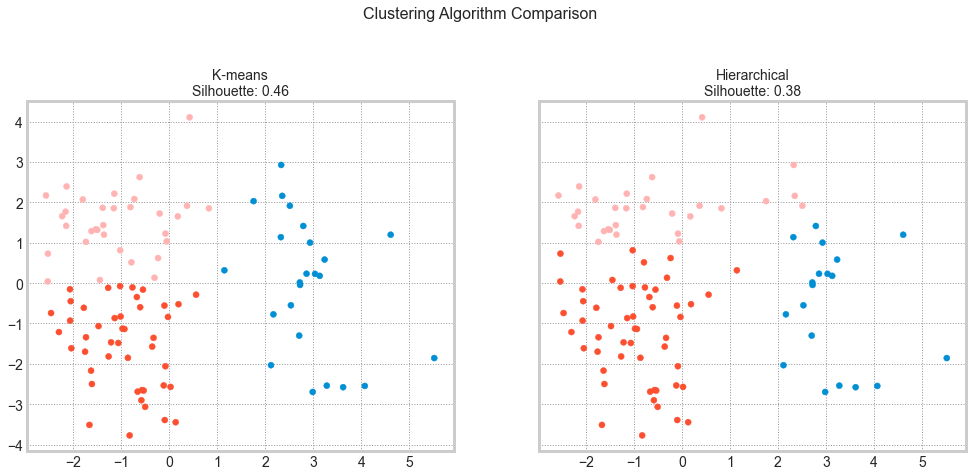

In [413]:
#plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=16, y=1.1)
fte_colors3 = {0: "#fc4f30",1: "#ffb3b3",2: "#008fd5"}
fte_colors4 = {0: "#fc4f30",1: "#008fd5",2: "#ffb3b3"}

#the k-means plot
km_colors = [fte_colors3[label] for label in model5.labels_]
ax1.scatter(c, d, c=km_colors)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette2}",fontsize=14)
#the hierarchical plot
db_colors = [fte_colors4[label] for label in model6.labels_]
ax2.scatter(c, d, c=db_colors)
ax2.set_title(f"Hierarchical\nSilhouette: {dbscan_silhouette2}",fontsize=14)

plt.show()

Conclusion:
- Hierarchical clustering seems to get better result with the same number of clusters because the silhouette score is lower than with K-means. That also means that the data in one cluster are closer to each other.

#### Notes
* ML Unsupervised algorithms
    - https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
* K-Means and evaluation techniques
    - https://realpython.com/k-means-clustering-python/
* Hierarchical Agglomerative Clustering
    - https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
    - https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
* PCA
    - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html